In [48]:
import pandas as pd

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = RuntimeWarning) 
wrn.filterwarnings('ignore', category = UserWarning)

In [49]:
data = pd.read_csv('predictive_maintenance.csv')
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [51]:
data = data.drop(['UDI','Product ID','Failure Type'],axis =1)
data

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                       1551         42.8                0       0  
1                       1408         46.3                3       0  
2                       1498         49.4                5       0  
3                       1433         39.5                7       0  
4                       1408         40.0                9       0  
...                      ...          ...              ...     ...  
9995                    1604         29.5               14       0  
9996                    1632         31.8               17       0  
9997                    1645         33.4               22       0  
9998                    1408         48.5               25       0  
9999                    1500         40.2               30       0  

[10000 rows x 7 columns]

In [52]:
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [53]:
#Feature scaling

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

labelencoder.fit(data['Type'])
data['Type']=labelencoder.transform(data['Type'])

data

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                       1551         42.8                0       0  
1                       1408         46.3                3       0  
2                       1498         49.4                5       0  
3                       1433         39.5                7       0  
4                       1408         40.0                9       0  
...                      ...          ...              ...     ...  
9995                    1604         29.5               14       0  
9996                    1632         31.8               17       0  
9997                    1645         33.4               22       0  
9998                    1408         48.5               25       0  
9999                    1500         40.2               30       0  

[10000 rows x 7 columns]

In [54]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

data['Air temperature [K]']=minmax.fit_transform(data[['Air temperature [K]']])
data['Process temperature [K]']=minmax.fit_transform(data[['Process temperature [K]']])
data['Rotational speed [rpm]']=minmax.fit_transform(data[['Rotational speed [rpm]']])
data['Torque [Nm]']=minmax.fit_transform(data[['Torque [Nm]']])
data['Tool wear [min]']=minmax.fit_transform(data[['Tool wear [min]']])
data

Type  Air temperature [K]  Process temperature [K]  \
0        2             0.304348                 0.358025   
1        1             0.315217                 0.370370   
2        1             0.304348                 0.345679   
3        1             0.315217                 0.358025   
4        1             0.315217                 0.370370   
...    ...                  ...                      ...   
9995     2             0.380435                 0.333333   
9996     0             0.391304                 0.333333   
9997     2             0.402174                 0.358025   
9998     0             0.402174                 0.370370   
9999     2             0.402174                 0.370370   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                   0.222934     0.535714         0.000000       0  
1                   0.139697     0.583791         0.011858       0  
2                   0.192084     0.626374         0.019763       0  
3                   0.154249     0.490385         0.027668       0  
4                   0.139697     0.497253         0.035573       0  
...                      ...          ...              ...     ...  
9995                0.253783     0.353022         0.055336       0  
9996                0.270081     0.384615         0.067194       0  
9997                0.277648     0.406593         0.086957       0  
9998                0.139697     0.614011         0.098814       0  
9999                0.193248     0.500000         0.118577       0  

[10000 rows x 7 columns]

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
y =  data['Target']
x =  data.drop('Target',axis = 1)

In [57]:
from sklearn.model_selection import train_test_split

# before feature selection

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 30)
params={}
model = LogisticRegression(**params)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

# after feature selection

In [59]:
#Feature selection
from sklearn.feature_selection import RFECV
feature = RFECV(estimator = LogisticRegression(), scoring="accuracy")
feature.fit(x,y)
#Saving dataframe with optimal features
feat = x.iloc[:, feature.support_]
print("Feature column list - Before selection:\n",feature.feature_names_in_.tolist())
print('\n')
print("Feature column list - After selection:\n", feat.columns.tolist())

Feature column list - Before selection:
 ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


Feature column list - After selection:
 ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [60]:
feat

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                0.304348                 0.358025                0.222934   
1                0.315217                 0.370370                0.139697   
2                0.304348                 0.345679                0.192084   
3                0.315217                 0.358025                0.154249   
4                0.315217                 0.370370                0.139697   
...                   ...                      ...                     ...   
9995             0.380435                 0.333333                0.253783   
9996             0.391304                 0.333333                0.270081   
9997             0.402174                 0.358025                0.277648   
9998             0.402174                 0.370370                0.139697   
9999             0.402174                 0.370370                0.193248   

      Torque [Nm]  Tool wear [min]  
0        0.535714         0.000000  
1        0.583791         0.011858  
2        0.626374         0.019763  
3        0.490385         0.027668  
4        0.497253         0.035573  
...           ...              ...  
9995     0.353022         0.055336  
9996     0.384615         0.067194  
9997     0.406593         0.086957  
9998     0.614011         0.098814  
9999     0.500000         0.118577  

[10000 rows x 5 columns]

In [61]:
x_train,x_test,y_train,y_test = train_test_split(feat,y,test_size = 30)
params={}
model_ = LogisticRegression(**params)
model_.fit(x_train,y_train)
y_pred = model_.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

In [66]:
corr = feat.corr()
corr

Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.876107   
Process temperature [K]             0.876107                 1.000000   
Rotational speed [rpm]              0.022670                 0.019277   
Torque [Nm]                        -0.013778                -0.014061   
Tool wear [min]                     0.013853                 0.013488   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Air temperature [K]                    0.022670    -0.013778         0.013853  
Process temperature [K]                0.019277    -0.014061         0.013488  
Rotational speed [rpm]                 1.000000    -0.875027         0.000223  
Torque [Nm]                           -0.875027     1.000000        -0.003093  
Tool wear [min]                        0.000223    -0.003093         1.000000

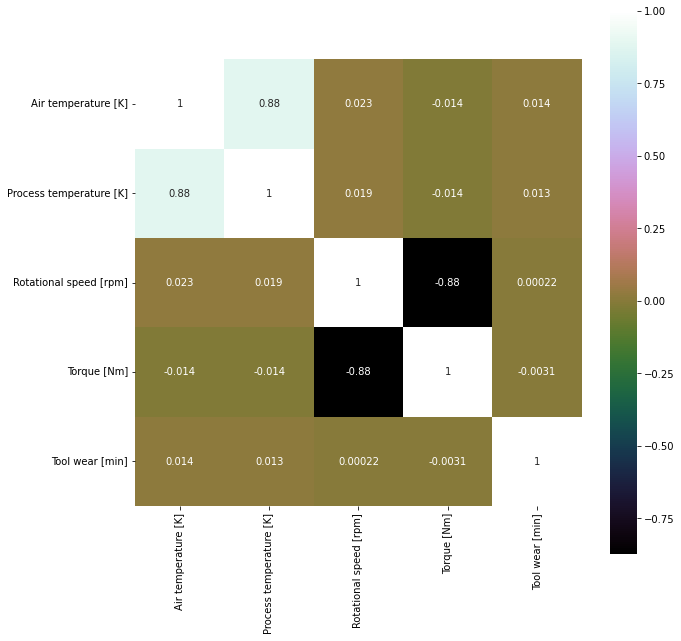

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.show()

In [62]:
 from sklearn.metrics import recall_score,precision_score

In [63]:
row=[]
m= pd.DataFrame(columns=['Accuracy'])
y_pred = model_.predict(x_test)
row.append(accuracy_score(y_test,y_pred))
m.loc[len(m.index)]=row
m

Accuracy
0  0.933333

In [64]:
import joblib as jb

jb.dump(model_,'MM.sav')

['MM.sav']